In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('sgemm_product.csv')

In [4]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [5]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'] )/4
data = df.copy()

In [6]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [7]:
df["Binary_Run"] = (df["Run"] >= df["Run"].median()).astype(int)
df["Binary_Run"].value_counts()

1    120801
0    120799
Name: Binary_Run, dtype: int64

In [8]:
df = df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)','Run'],axis=1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Binary_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape[0], y.shape[0])

241600 241600


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
y_train.shape[0]

169120

In [12]:
X_train.shape[0]

169120

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [14]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [16]:
clf.feature_importances_

array([0.2245121 , 0.15419686, 0.0228988 , 0.17959101, 0.15753325,
       0.01510262, 0.01458076, 0.00982023, 0.06834693, 0.03482033,
       0.0310623 , 0.01018168, 0.04129437, 0.03605876])

Feature: 0, Score: 0.22451
Feature: 1, Score: 0.15420
Feature: 2, Score: 0.02290
Feature: 3, Score: 0.17959
Feature: 4, Score: 0.15753
Feature: 5, Score: 0.01510
Feature: 6, Score: 0.01458
Feature: 7, Score: 0.00982
Feature: 8, Score: 0.06835
Feature: 9, Score: 0.03482
Feature: 10, Score: 0.03106
Feature: 11, Score: 0.01018
Feature: 12, Score: 0.04129
Feature: 13, Score: 0.03606


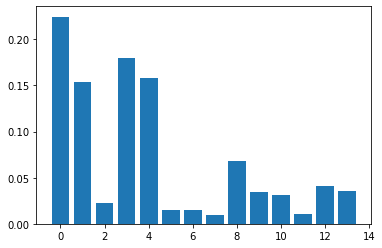

In [17]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [18]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Binary_Run'],
      dtype='object')

In [19]:
features = ['MWG', 'NWG','MDIMC', 'NDIMC','VWM','VWN', 'STRM','SA', 'SB','Binary_Run']

In [20]:
df1 = df[features]

In [21]:
df1

,MWG,NWG,MDIMC,NDIMC,VWM,VWN,STRM,SA,SB,Binary_Run
0,16,16,8,8,1,1,0,0,0,1
1,16,16,8,8,1,1,0,0,1,1
2,16,16,8,8,1,1,0,1,0,1
3,16,16,8,8,1,1,0,1,1,1
4,16,16,8,8,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,4,4,1,1,1,0
241596,128,128,32,32,4,4,1,0,0,0
241597,128,128,32,32,4,4,1,0,1,0
241598,128,128,32,32,4,4,1,1,0,0


In [22]:
df2 = df1.sample(n=5000, random_state=0)

In [23]:
X = df2.iloc[:,:]
print(X.shape,)

(5000, 10)


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [25]:
X

array([[-0.38027308,  1.16791265, -0.7614195 , ..., -1.03087646,
         1.00561577,  1.0226566 ],
       [-1.13448388,  1.16791265,  0.23755649, ..., -1.03087646,
        -0.99441559, -0.97784535],
       [ 1.12814851, -1.49075029, -0.7614195 , ..., -1.03087646,
        -0.99441559, -0.97784535],
       ...,
       [-1.13448388,  1.16791265,  0.23755649, ...,  0.97004834,
        -0.99441559, -0.97784535],
       [-0.38027308, -1.49075029, -0.7614195 , ...,  0.97004834,
        -0.99441559, -0.97784535],
       [-1.13448388,  1.16791265,  2.23550848, ..., -1.03087646,
         1.00561577, -0.97784535]])

# K-Means Clustering

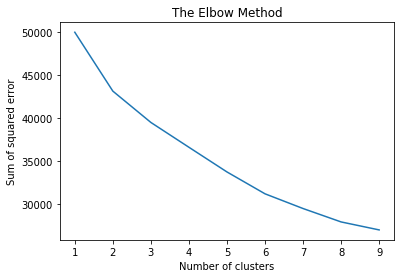

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.show()

In [27]:
X1 = pd.DataFrame(X)
X1

,0,1,2,3,4,5,6,7,8,9
0,-0.380273,1.167913,-0.761420,-0.742861,-0.738548,-0.199446,-1.016944,-1.030876,1.005616,1.022657
1,-1.134484,1.167913,0.237556,0.267559,-0.204761,2.971400,-1.016944,-1.030876,-0.994416,-0.977845
2,1.128149,-1.490750,-0.761420,0.267559,-0.204761,-0.727921,0.983339,-1.030876,-0.994416,-0.977845
3,1.128149,-1.110941,-0.761420,0.267559,0.862813,-0.727921,-1.016944,0.970048,1.005616,-0.977845
4,1.128149,1.167913,-0.761420,0.267559,0.862813,-0.727921,0.983339,-1.030876,-0.994416,1.022657
...,...,...,...,...,...,...,...,...,...,...
4995,1.128149,-0.351323,-0.761420,-0.742861,-0.204761,-0.727921,0.983339,-1.030876,-0.994416,1.022657
4996,-1.134484,1.167913,-0.761420,-0.742861,0.862813,0.857503,-1.016944,-1.030876,-0.994416,1.022657
4997,-1.134484,1.167913,0.237556,-0.742861,-0.738548,-0.199446,-1.016944,0.970048,-0.994416,-0.977845
4998,-0.380273,-1.490750,-0.761420,-0.742861,-0.204761,-0.199446,0.983339,0.970048,-0.994416,-0.977845


In [28]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [29]:
y_kmeans

array([5, 4, 3, ..., 3, 3, 4])

In [30]:
clustersDf = pd.DataFrame(y_kmeans)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([X1, clustersDf], axis = 1).reset_index()

In [31]:
combinedDf = combinedDf.drop(columns= 'index')

In [32]:
# Default value of display.max_rows is 10 i.e. at max 10 rows will be printed.
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

In [33]:
combinedDf.head(100)

,0,1,2,3,4,5,6,7,8,9,cluster_predicted
0,-0.380273,1.167913,-0.761420,-0.742861,-0.738548,-0.199446,-1.016944,-1.030876,1.005616,1.022657,5
1,-1.134484,1.167913,0.237556,0.267559,-0.204761,2.971400,-1.016944,-1.030876,-0.994416,-0.977845,4
2,1.128149,-1.490750,-0.761420,0.267559,-0.204761,-0.727921,0.983339,-1.030876,-0.994416,-0.977845,3
3,1.128149,-1.110941,-0.761420,0.267559,0.862813,-0.727921,-1.016944,0.970048,1.005616,-0.977845,3
4,1.128149,1.167913,-0.761420,0.267559,0.862813,-0.727921,0.983339,-1.030876,-0.994416,1.022657,5
5,1.128149,1.167913,0.237556,0.267559,2.997962,-0.199446,-1.016944,0.970048,1.005616,1.022657,2
6,1.128149,-0.351323,-0.761420,0.267559,-0.204761,-0.199446,-1.016944,-1.030876,-0.994416,1.022657,5
7,1.128149,1.167913,0.237556,0.267559,2.997962,0.857503,-1.016944,0.970048,-0.994416,1.022657,2
8,1.128149,1.167913,0.237556,0.267559,0.862813,-0.199446,0.983339,-1.030876,1.005616,1.022657,5
9,-0.380273,1.167913,2.235508,-0.742861,-0.204761,0.857503,0.983339,0.970048,-0.994416,-0.977845,0


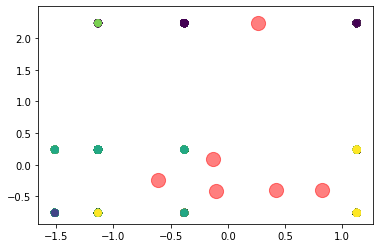

In [34]:
plt.scatter(X[:, 0], X[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='red', s=200, alpha=0.5);

# Expectation Maximization

In [35]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X1)
pred_gmm = gmm.predict(X1)

In [36]:
pred_gmm

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [37]:
clustersDfg = pd.DataFrame(pred_gmm)
X2 = pd.DataFrame(X1)
clustersDfg.columns = ['cluster_predicted']
combinedDfg = pd.concat([X2, clustersDfg], axis = 1).reset_index()

In [38]:
combinedDfg = combinedDfg.drop(columns= 'index')

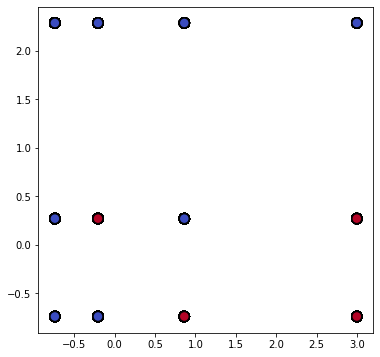

In [39]:
# Plot the clusters
plt.figure( figsize=(6,6))
plt.scatter(combinedDfg.iloc[:,4], combinedDfg.iloc[:,3], c=pred_gmm, edgecolor='black', lw=1.5, s=100,
            cmap=plt.get_cmap('coolwarm_r'))
plt.show()